# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
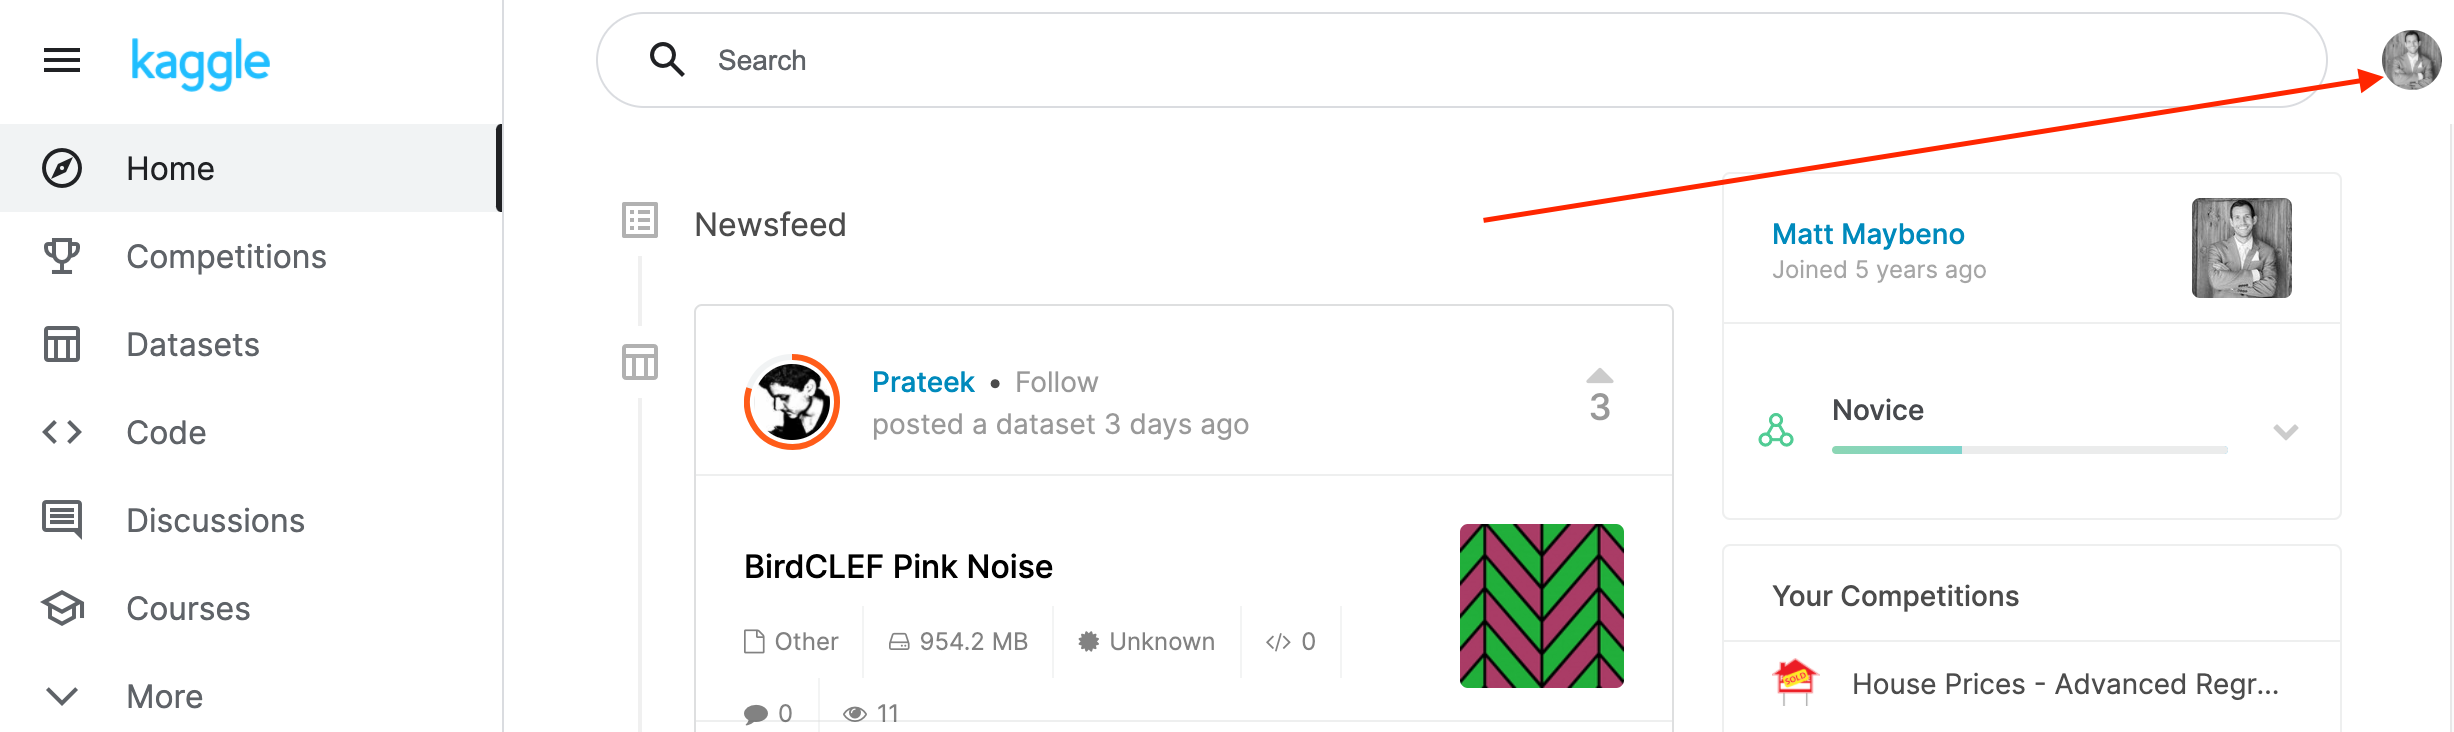
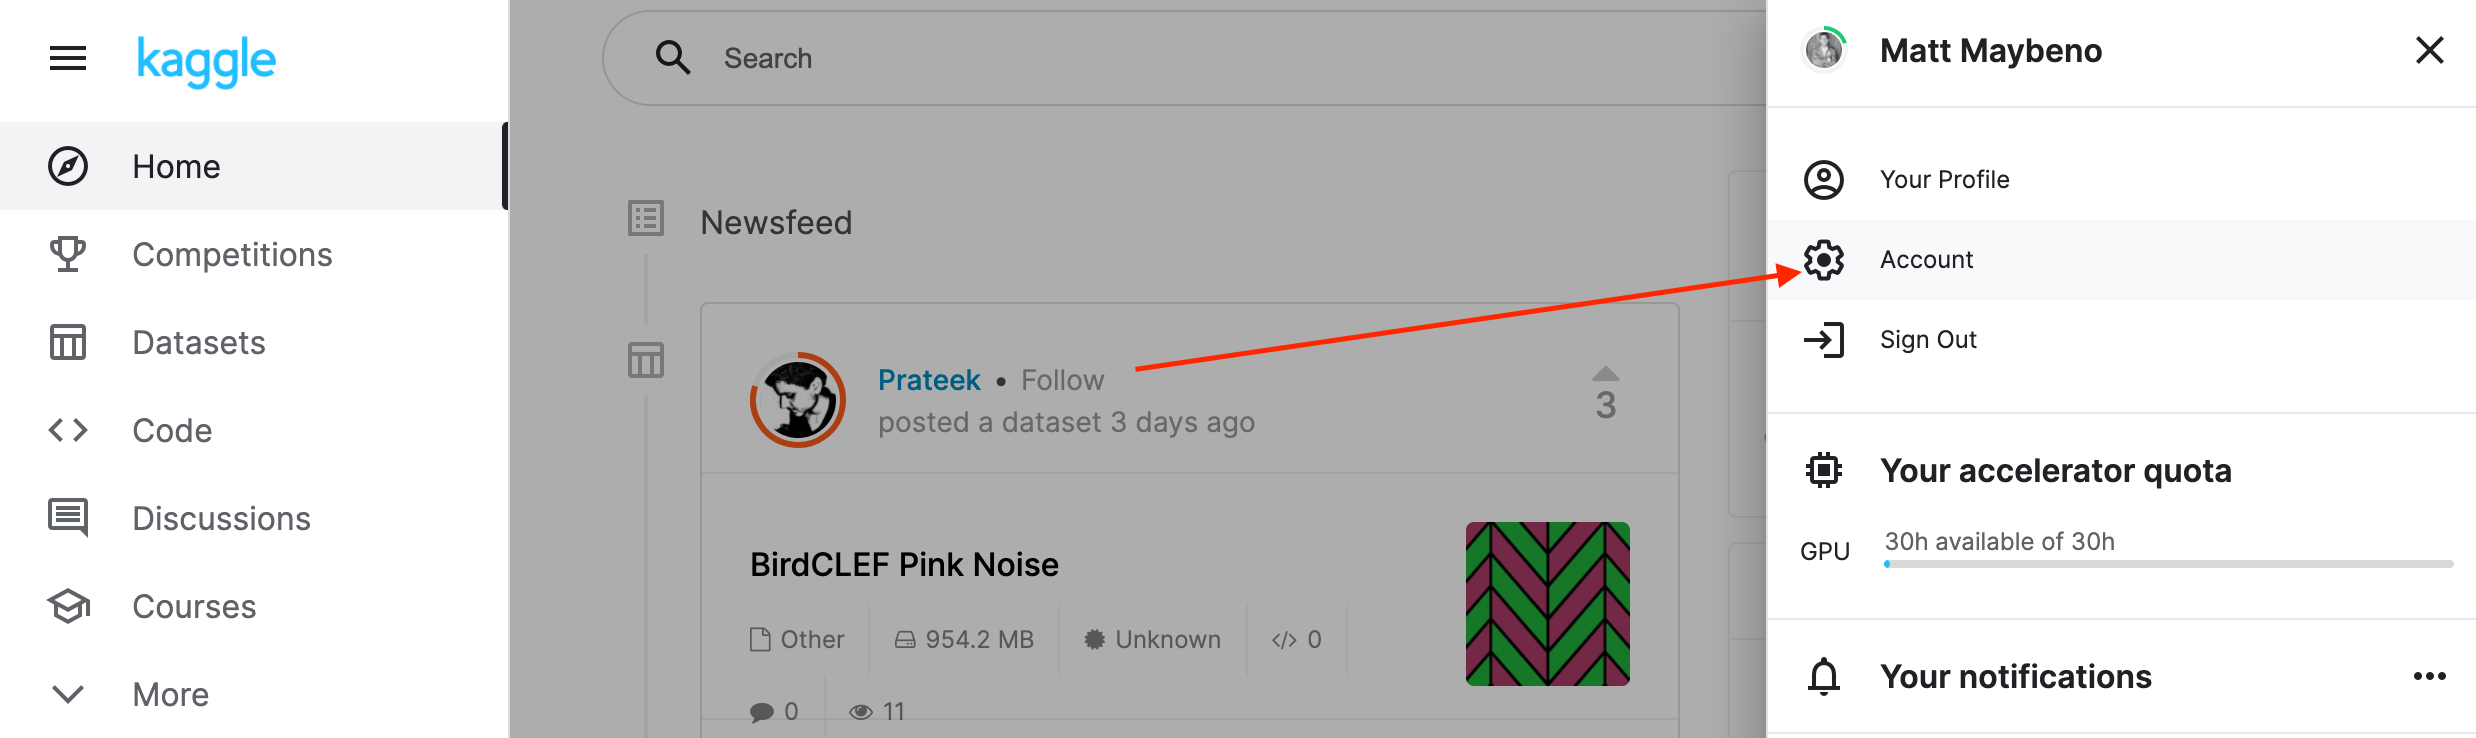
2. Scroll down to API and click Create New API Token.
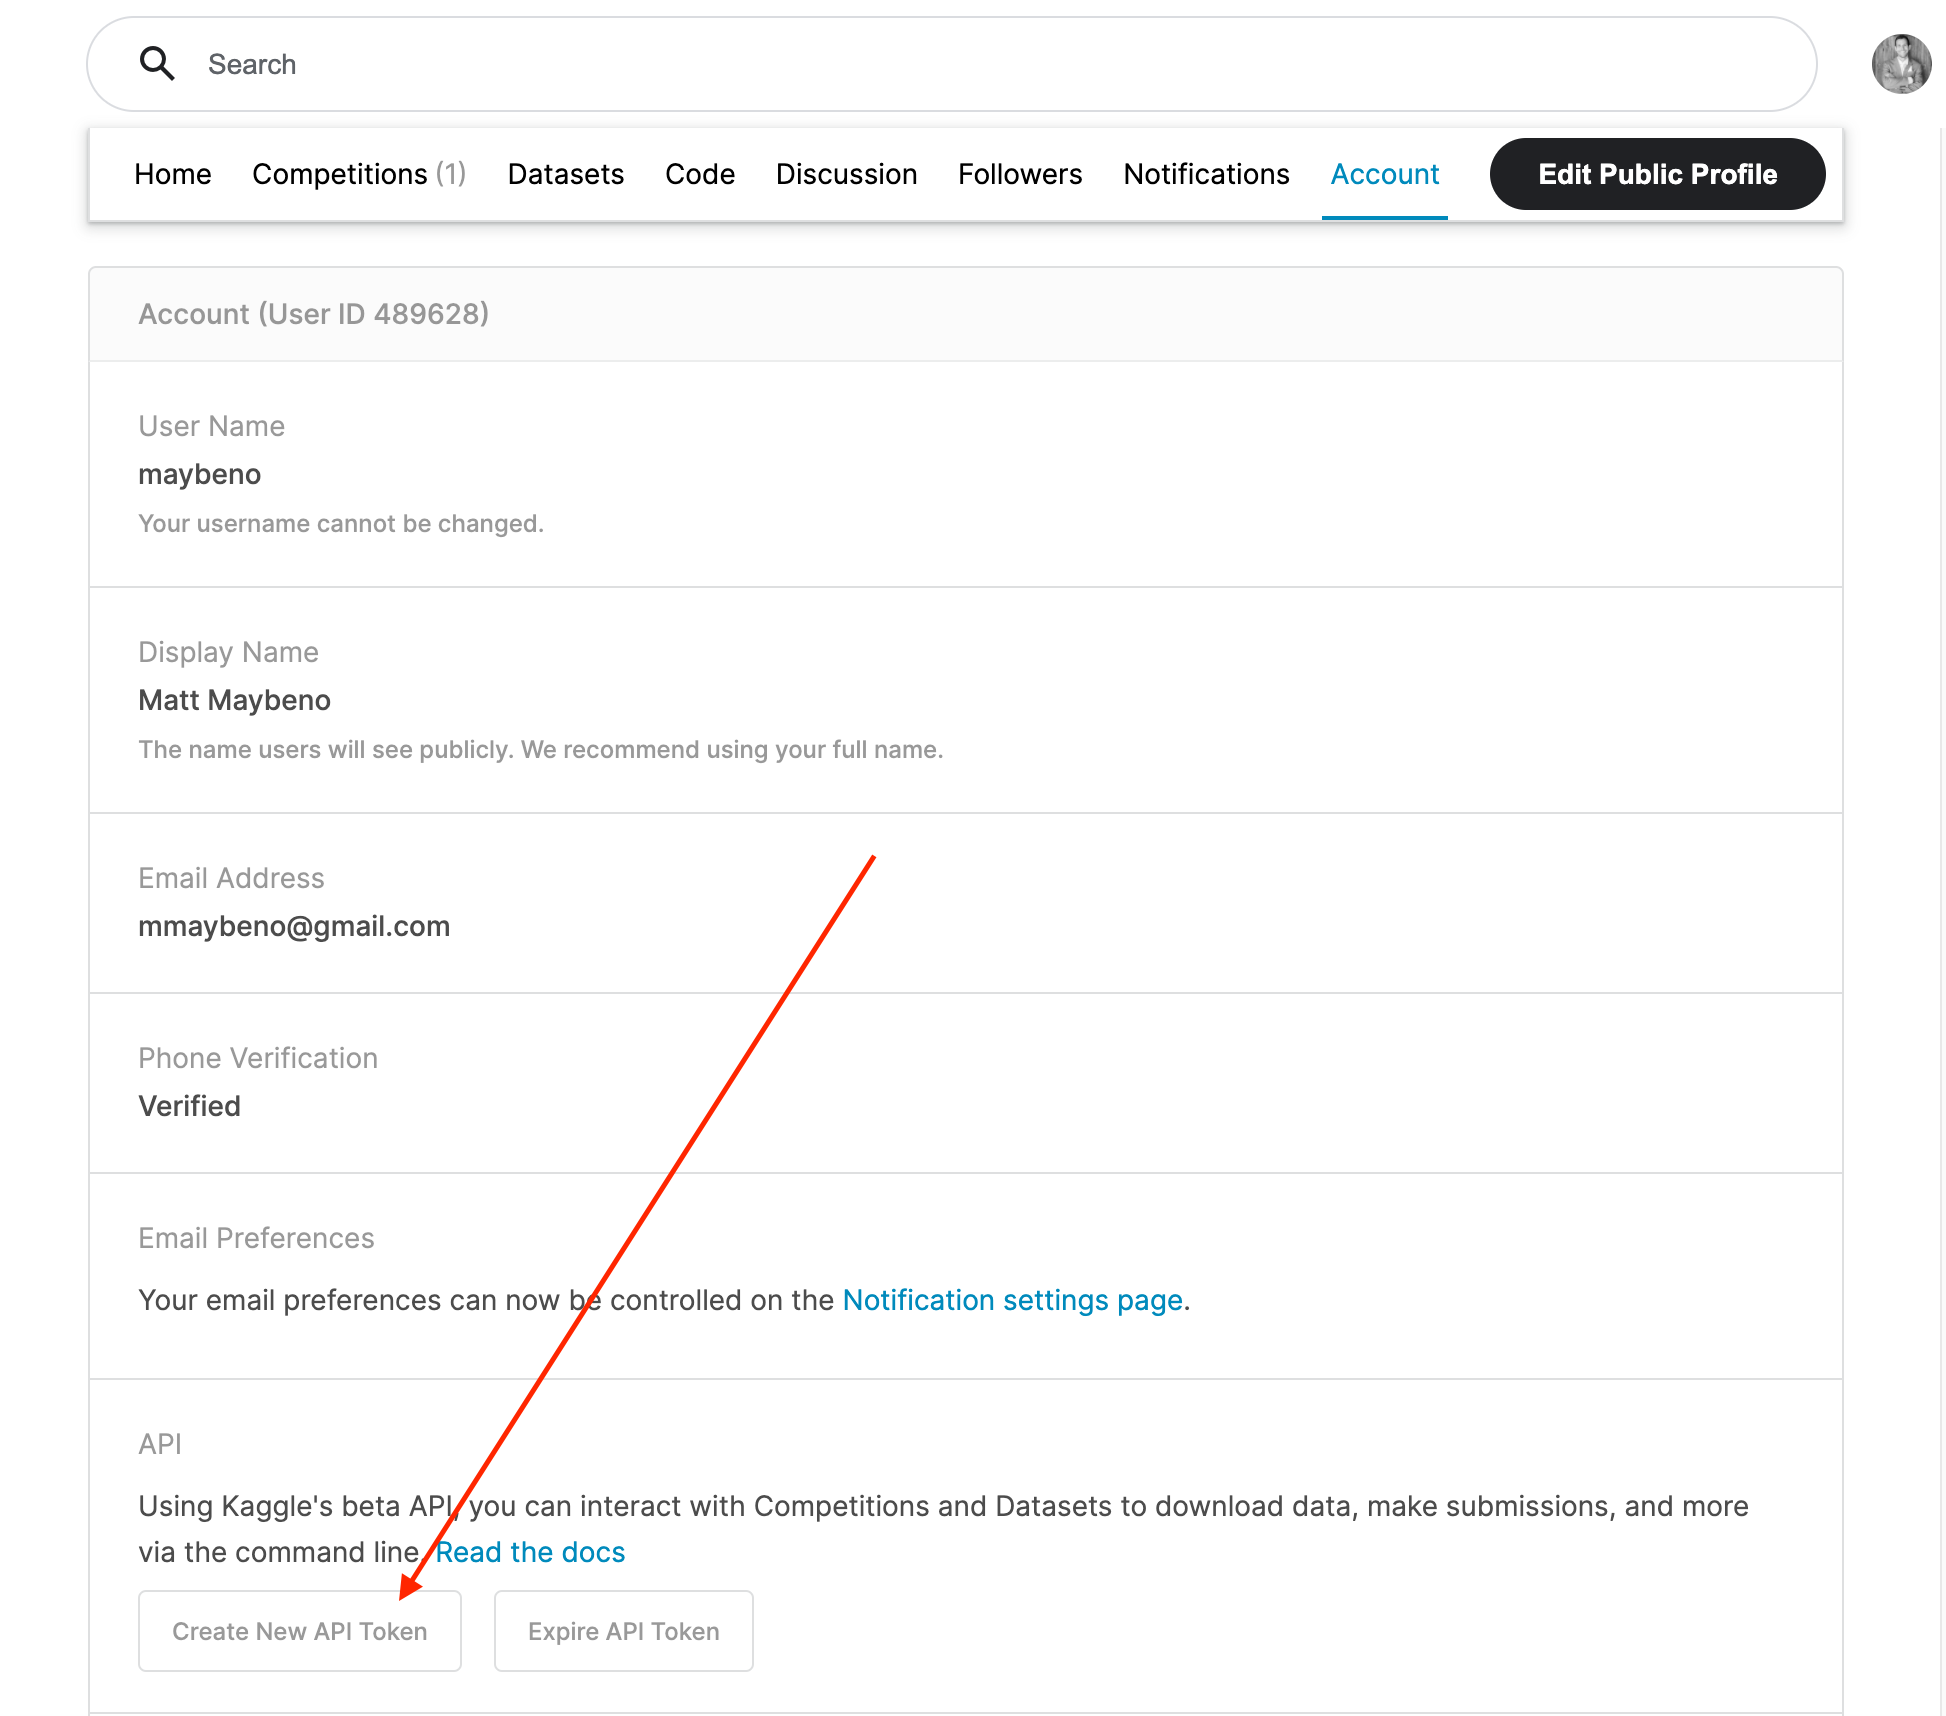
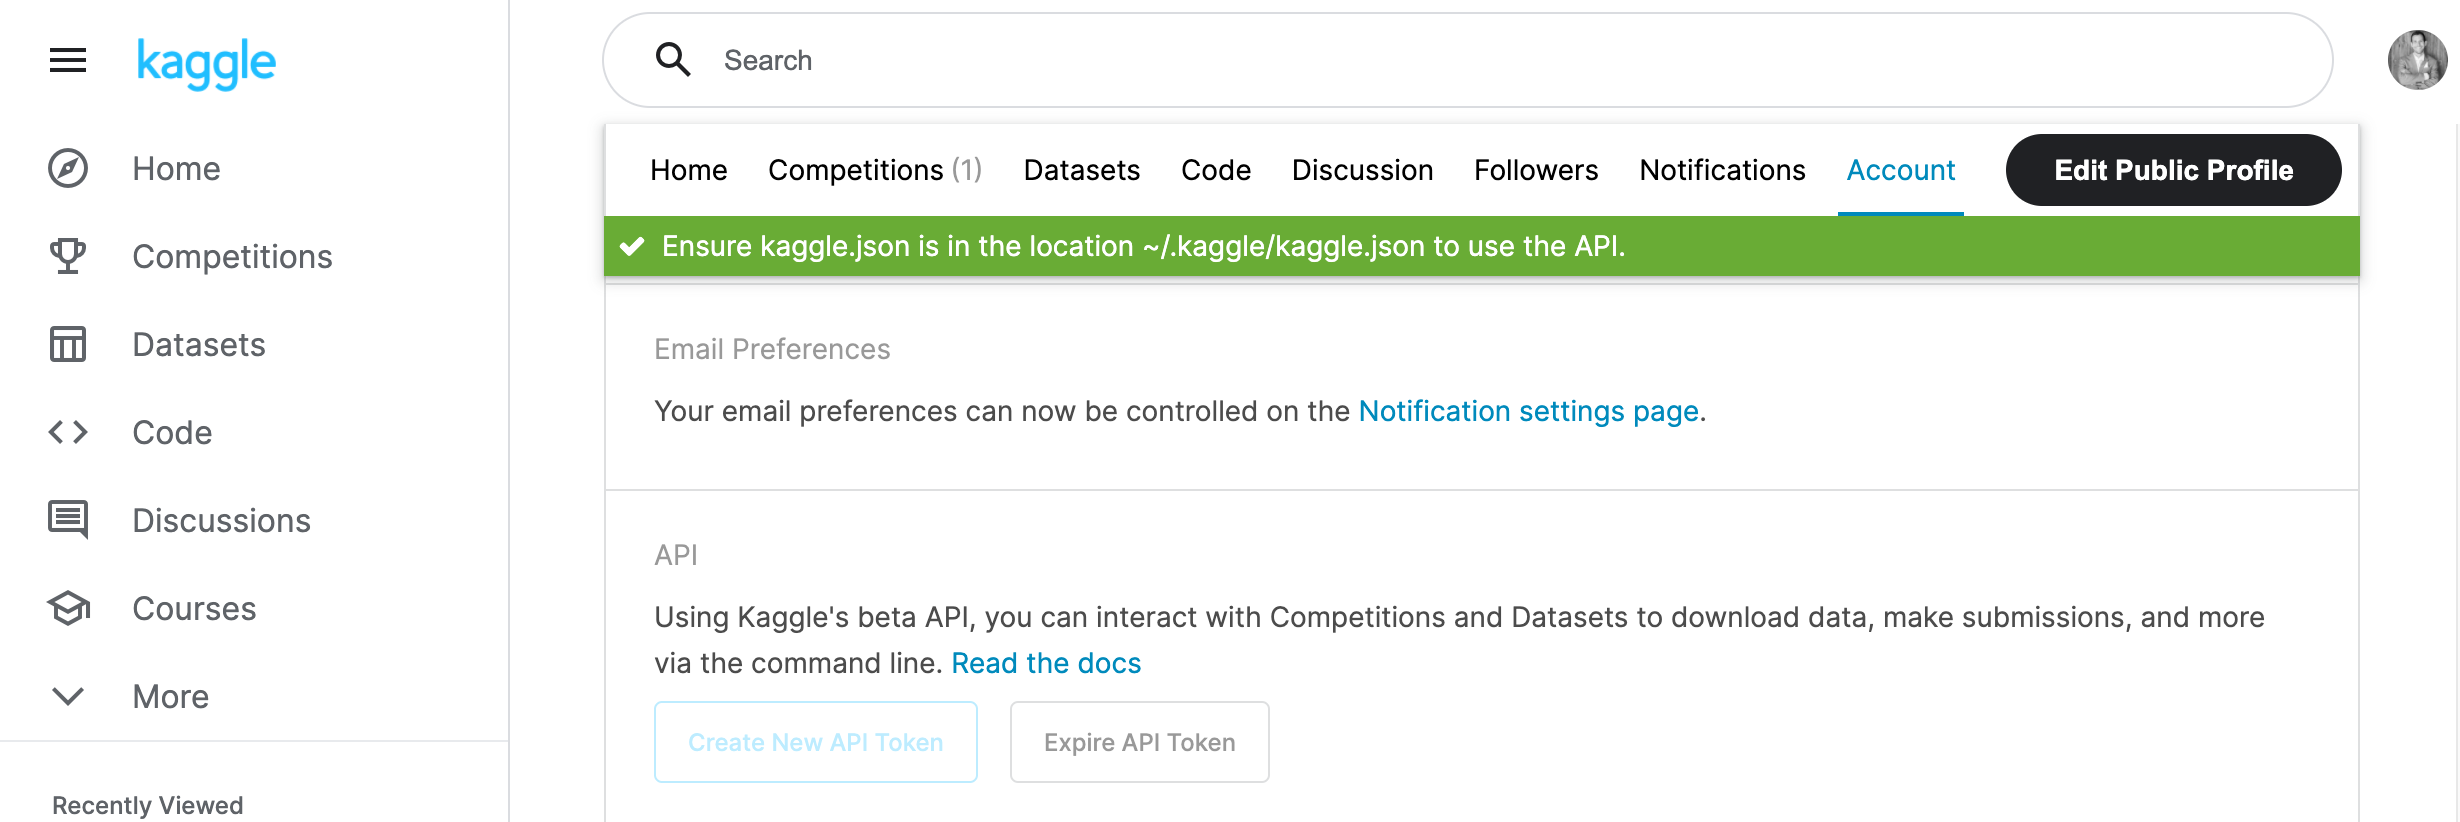
3. Open up `kaggle.json` and use the username and key.
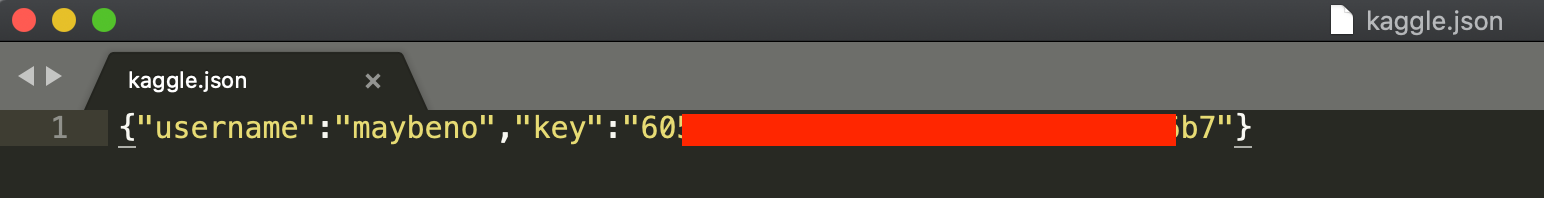

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
  Using cached setuptools-80.8.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.8.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 80.1.0
    Uninstalling setuptools-80.1.0:
      Successfully uninstalled setuptools-80.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.18.1 requires dash-core-components==2.0.0, which is not installed.
dash 2.18.1 requires dash-html-components==2.0.0, which is not installed.
dash 2.18.1 requires dash-table==5.0.0, which is not installed.
dash 2.18.1 requires Flask<3.1,>=1.0.4, but you have flask 3.1.

### Setup Kaggle API Key and Download Dataset

In [3]:
!pip install -q kaggle
#installing kaggle API client

In [4]:
!mkdir -p ~/.kaggle #creating a kaggle directory

In [5]:
!cp kaggle.json ~/.kaggle/ #copying kaggle.json to the folder i've created

In [6]:
!chmod 600 ~/.kaggle/kaggle.json #authorizing permissions

In [7]:
!kaggle competitions download -c bike-sharing-demand
!unzip -o bike-sharing-demand.zip #downloading the zipfile and unzipping the dataset


bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
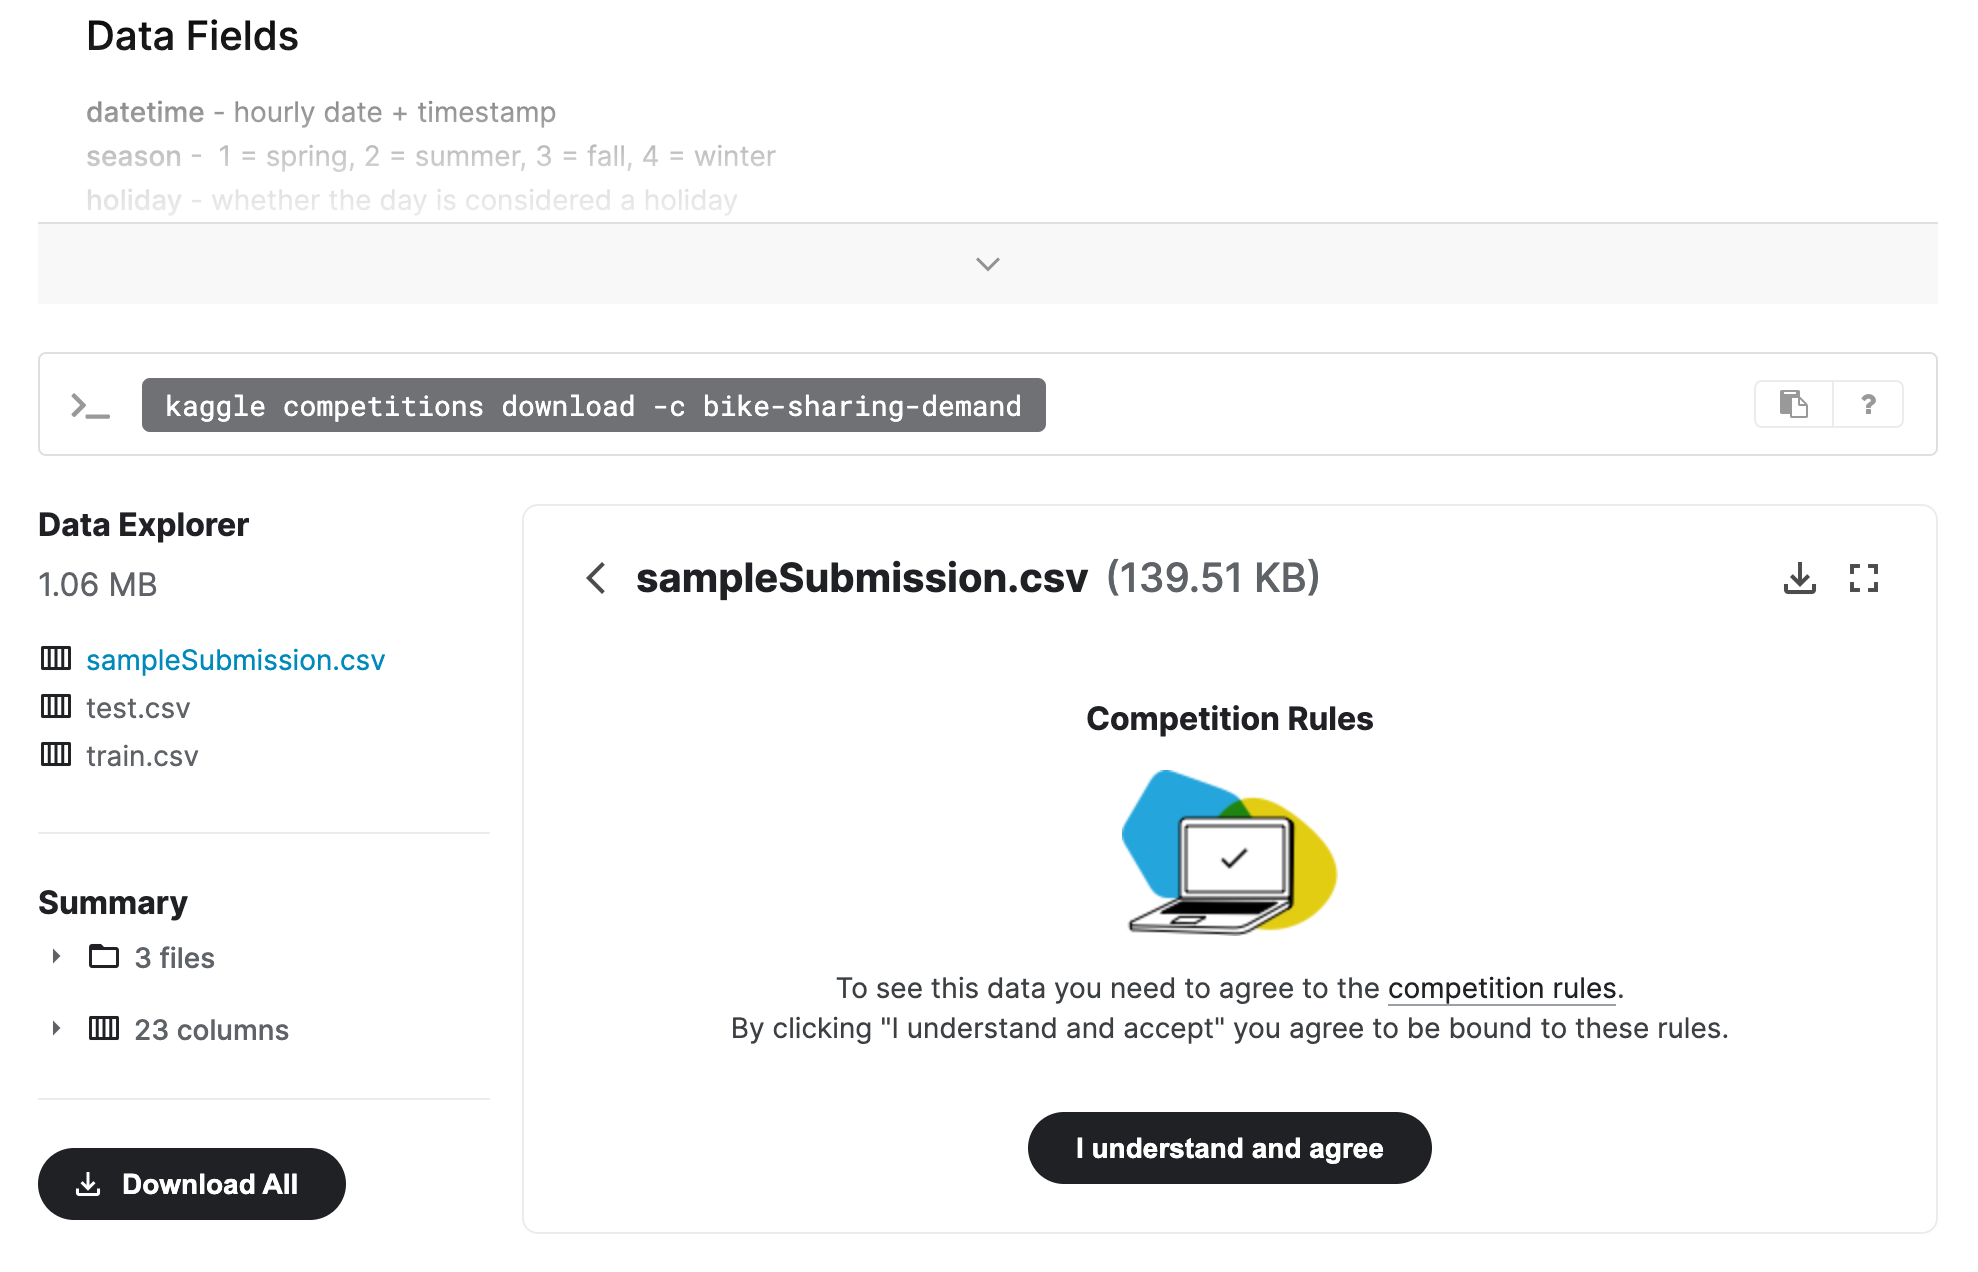

In [8]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

In [9]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
# Simple output of the train dataset to view some of the min/max/variation of the dataset features.
train.describe() #summary of train dataset that shows count, mean, min, max, variance.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [11]:
train.isnull().sum() #checks if there are null values present

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
train.info() #gives information on datatypes of features in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [13]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates = ["datetime"]) 
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [14]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [49]:
# Shape of train and test datasets
print("Train Dataset Shape : ", train.shape)
print("Test Dataset Shape  : ", test.shape)

Train Dataset Shape :  (10886, 12)
Test Dataset Shape  :  (6493, 9)


Some features are absent in the test dataset. Hence, checking features that are not present in the test dataset.

In [50]:
print("Variables that are not present in the test dataset: ")
list(set(train.columns).difference(set(test.columns)))

Variables that are not present in the test dataset: 


['count', 'registered', 'casual']

Count is the output here. Registered and casual are independent features so we can remove them while training.

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [15]:
# Requirements: For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "best_quality"                     # auto_stack=True

In [16]:
!pip install "pydantic<2.0" --force-reinstall
!pip install "ray[default]==2.10.0" --force-reinstall


  Using cached pydantic-1.10.22-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (154 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
Using cached pydantic-1.10.22-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.13.2
    Uninstalling typing_extensions-4.13.2:
      Successfully uninstalled typing_extensions-4.13.232m0/2 [typing-extensions]
  Attempting uninstall: pydantic━━━━━━━━━━━━━━━━ 0/2 [typing-extensions]
    Found existing installation: pydantic 2.11.3 0/2 [typing-extensions]
    Uninstalling pydantic-2.11.3:━━━━━━━━━━━ 0/2 [typing-extensions]
      Successfully uninstalled pydantic-2.11.30m 0/2 [typing-extensions]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pydantic]1/2 [pydantic]
ERROR: pip's dependency resolver does not currently take into account

In [17]:
predictor = TabularPredictor(label=label, 
                             problem_type= 'regression', 
                             eval_metric=eval_metric, 
                             learner_kwargs={'ignored_columns': ignored_columns}).fit(train_data = train_data,
                                                                           time_limit=time_limit,
                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20250524_060132"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 19 16:54:57 UTC 2025
CPU Count:          2
Memory Avail:       2.03 GB / 3.76 GB (54.1%)
Disk Space Avail:   3.84 GB / 4.99 GB (76.9%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identi

(_ray_fit pid=542) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=644) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=677) [3000]	valid_set's rmse: 126.147 [repeated 3x across cluster]
(_ray_fit pid=710) [3000]	valid_set's rmse: 133.639 [repeated 6x across cluster]
(_ray_fit pid=710) [7000]	valid_set's rmse: 132.416 [repeated 7x across cluster]
(_ray_fit pid=762) [1000]	valid_set's rmse: 137.712 [repeated 3x across cluster]
(_ray_fit pid=762) [4000]	valid_set's rmse: 135.344 [repeated 3x across cluster]
(_ray_fit pid=762) [8000]	valid_set's rmse: 135.261 [repeated 7x across cluster]


(_dystack pid=411) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=411) 	62.57s	 = Training   runtime
(_dystack pid=411) 	9.83s	 = Validation runtime
(_dystack pid=411) Fitting model: LightGBM_BAG_L1 ... Training model for up to 25.92s of the 74.16s of remaining time.
(_dystack pid=411) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.58%)


(_ray_fit pid=844) [1000]	valid_set's rmse: 129.274 [repeated 3x across cluster]
(_ray_fit pid=908) [1000]	valid_set's rmse: 135.098 [repeated 2x across cluster]


(_dystack pid=411) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_dystack pid=411) I0000 00:00:1748066585.677883     484 chttp2_transport.cc:1182] ipv4:169.255.255.2:44311: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {created_time:"2025-05-24T06:03:05.676761078+00:00", http2_error:2, grpc_status:14}


(_ray_fit pid=975) [1000]	valid_set's rmse: 124.896
(_ray_fit pid=977) [1000]	valid_set's rmse: 134.058
(_ray_fit pid=1041) [1000]	valid_set's rmse: 134.479
(_ray_fit pid=1072) [1000]	valid_set's rmse: 136.511


(_dystack pid=411) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=411) 	26.64s	 = Training   runtime
(_dystack pid=411) 	1.17s	 = Validation runtime
(_dystack pid=411) Fitting model: WeightedEnsemble_L2 ... Training model for up to 144.68s of the 43.42s of remaining time.
(_dystack pid=411) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=411) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=411) 	0.02s	 = Training   runtime
(_dystack pid=411) 	0.0s	 = Validation runtime
(_dystack pid=411) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=411) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 43.39s of the 43.18s of remaining time.
(_dystack pid=411) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.68%)


(_ray_fit pid=1110) [1000]	valid_set's rmse: 68.8067
(_ray_fit pid=1111) [1000]	valid_set's rmse: 69.9415


(_dystack pid=411) I0000 00:00:1748066611.319310     471 chttp2_transport.cc:1182] ipv4:169.255.255.2:33375: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {created_time:"2025-05-24T06:03:31.319305859+00:00", http2_error:2, grpc_status:14}


(_ray_fit pid=1176) [1000]	valid_set's rmse: 78.2341
(_ray_fit pid=1207) [1000]	valid_set's rmse: 72.9773
(_ray_fit pid=1252) [1000]	valid_set's rmse: 75.8581
(_ray_fit pid=1283) [1000]	valid_set's rmse: 76.948
(_ray_fit pid=1321) [1000]	valid_set's rmse: 75.9102
(_ray_fit pid=1318) [1000]	valid_set's rmse: 71.9787


(_dystack pid=411) 	-73.6831	 = Validation score   (-root_mean_squared_error)
(_dystack pid=411) 	34.04s	 = Training   runtime
(_dystack pid=411) 	1.75s	 = Validation runtime
(_dystack pid=411) Fitting model: LightGBM_BAG_L2 ... Training model for up to 5.45s of the 5.25s of remaining time.
(_dystack pid=411) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.61%)
(_ray_fit pid=1388) 	Ran out of time, early stopping on iteration 396. Best iteration is:
(_ray_fit pid=1388) 	[204]	valid_set's rmse: 63.4345
(_ray_fit pid=1455) 	Ran out of time, early stopping on iteration 394. Best iteration is:
(_ray_fit pid=1455) 	[225]	valid_set's rmse: 69.1472
(_ray_fit pid=1453) 	Ran out of time, early stopping on iteration 354. Best iteration is:
(_ray_fit pid=1453) 	[133]	valid_set's rmse: 68.5573
(_ray_fit pid=1523) 	Ran out of time, early stopping on iteration 396. Best iteration is:
(_ray_fit pid=1523) 	[141]	valid_set'

### Review AutoGluon's training run with ranking of models that did the best.

In [18]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.045783  root_mean_squared_error      17.173643  401.572483                0.000711           0.031286            3       True         13
1   RandomForestMSE_BAG_L2  -53.334121  root_mean_squared_error      13.372863  323.608806                0.716166          39.908871            2       True         12
2          LightGBM_BAG_L2  -55.033339  root_mean_squared_error      12.942808  308.672708                0.286112          24.972773            2       True         11
3        LightGBMXT_BAG_L2  -60.439562  root_mean_squared_error      16.170655  336.659553                3.513958          52.959617            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.055735    0.030307   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.7265454269546,

In [19]:
leaderboard_df = pd.DataFrame(predictor.leaderboard(silent=True))
leaderboard_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-53.045783,root_mean_squared_error,17.173643,401.572483,0.000711,0.031286,3,True,13
1,RandomForestMSE_BAG_L2,-53.334121,root_mean_squared_error,13.372863,323.608806,0.716166,39.908871,2,True,12
2,LightGBM_BAG_L2,-55.033339,root_mean_squared_error,12.942808,308.672708,0.286112,24.972773,2,True,11
3,LightGBMXT_BAG_L2,-60.439562,root_mean_squared_error,16.170655,336.659553,3.513958,52.959617,2,True,10
4,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.055735,0.030307,0.055735,0.030307,1,True,2
5,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.056547,0.074472,0.000812,0.044166,2,True,9
6,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.059753,0.034003,0.059753,0.034003,1,True,1
7,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.598441,14.736580,0.598441,14.736580,1,True,5
8,ExtraTreesMSE_BAG_L1,-124.600676,root_mean_squared_error,0.652130,6.975743,0.652130,6.975743,1,True,7
9,CatBoost_BAG_L1,-130.726545,root_mean_squared_error,0.099020,134.535339,0.099020,134.535339,1,True,6


### Create predictions from test dataset

In [20]:
predictions = predictor.predict(test)
predictions.head()

0    22.016716
1    42.961903
2    46.333241
3    49.269966
4    51.855461
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [21]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.554321
std        89.812721
min         3.108874
25%        19.730709
50%        63.720371
75%       167.063477
max       366.608246
Name: count, dtype: float64

In [22]:
# How many negative values do we have?
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


In [23]:
# Set them to zero
predictions[predictions<0] = 0 
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


### Set predictions to submission dataframe, save, and submit

In [24]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [25]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 731kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [26]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                        description           status                     publicScore  privateScore  
--------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv  2025-05-24 06:14:15.857000  first raw submission  SubmissionStatus.COMPLETE  1.80193      1.80193       
submission.csv  2025-05-23 16:29:22.550000  first raw submission  SubmissionStatus.COMPLETE  1.79970      1.79970       


#### Initial score of `1.80193`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

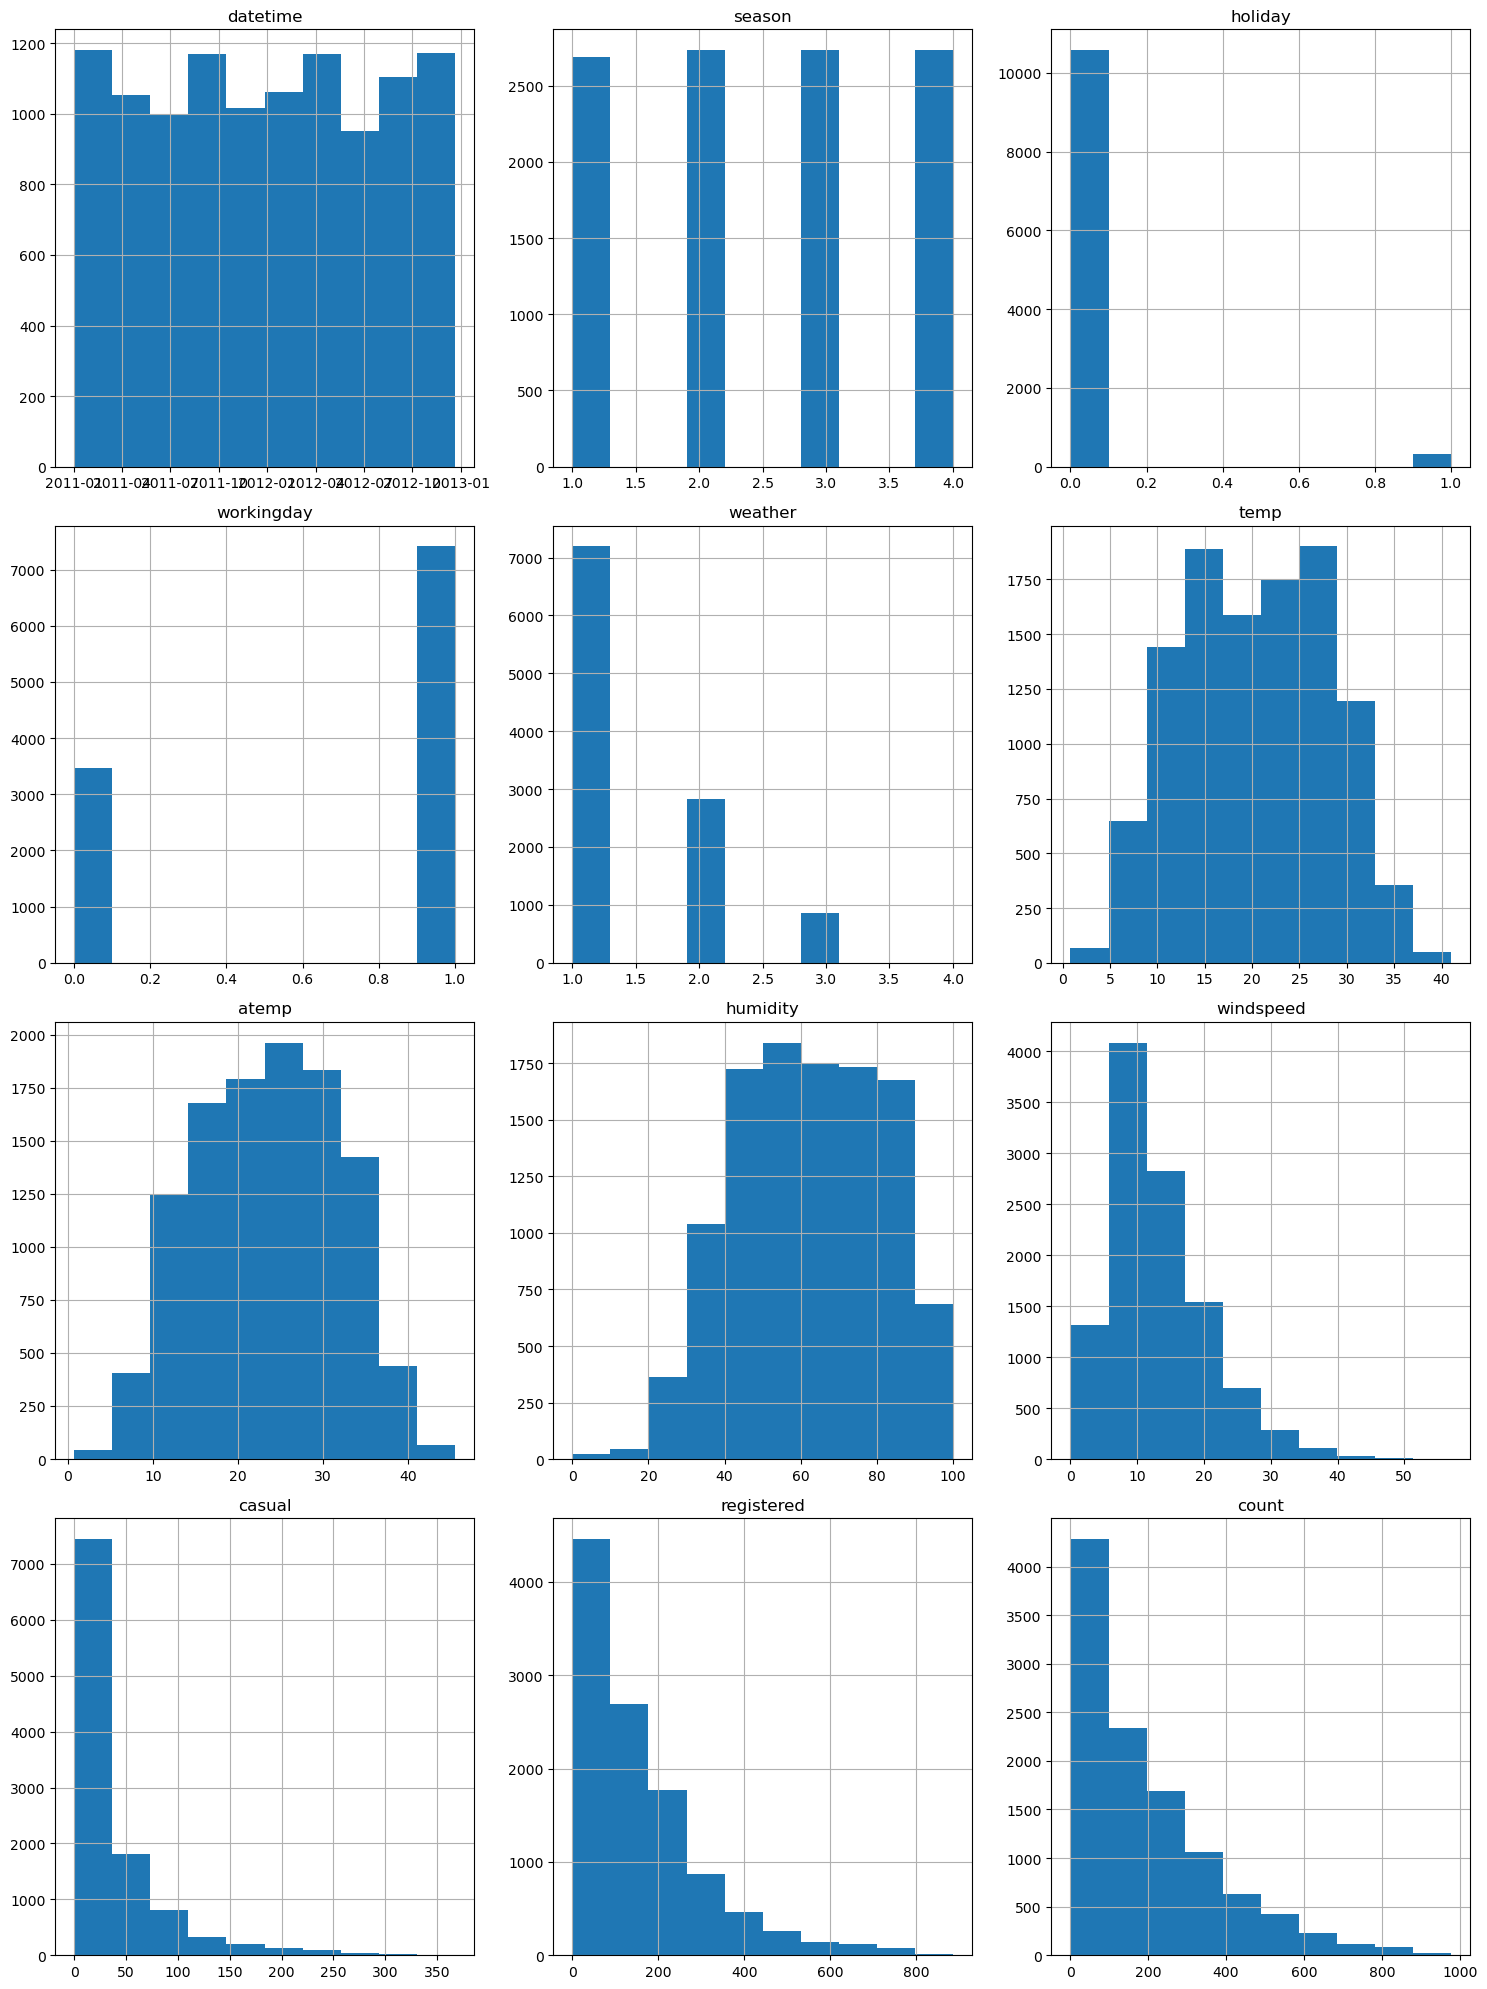

In [27]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist(figsize=(15,20))  # Note: 'casual' and 'registered' are ignored during training as they are absent in test data

plt.tight_layout()
plt.show()

In [28]:
train['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [29]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
train["hour"] = train["datetime"].dt.hour
train.drop(["datetime"], axis=1, inplace=True)     # Drop 'datetime' feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [30]:
# Splitting the 'datetime' feature in test data
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
test["hour"] = test["datetime"].dt.hour
test.drop(["datetime"], axis=1, inplace=True)   # Drop 'datetime' feature
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [31]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [32]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  year        10886 non-null  int32   
 12  month       10886 non-null  int32   
 13  day         10886 non-null  int32   
 14  hour        10886 non-null  int32   
dtypes: category(2), float64(3), int32(4), int64(6)
memory usage: 957.3 KB


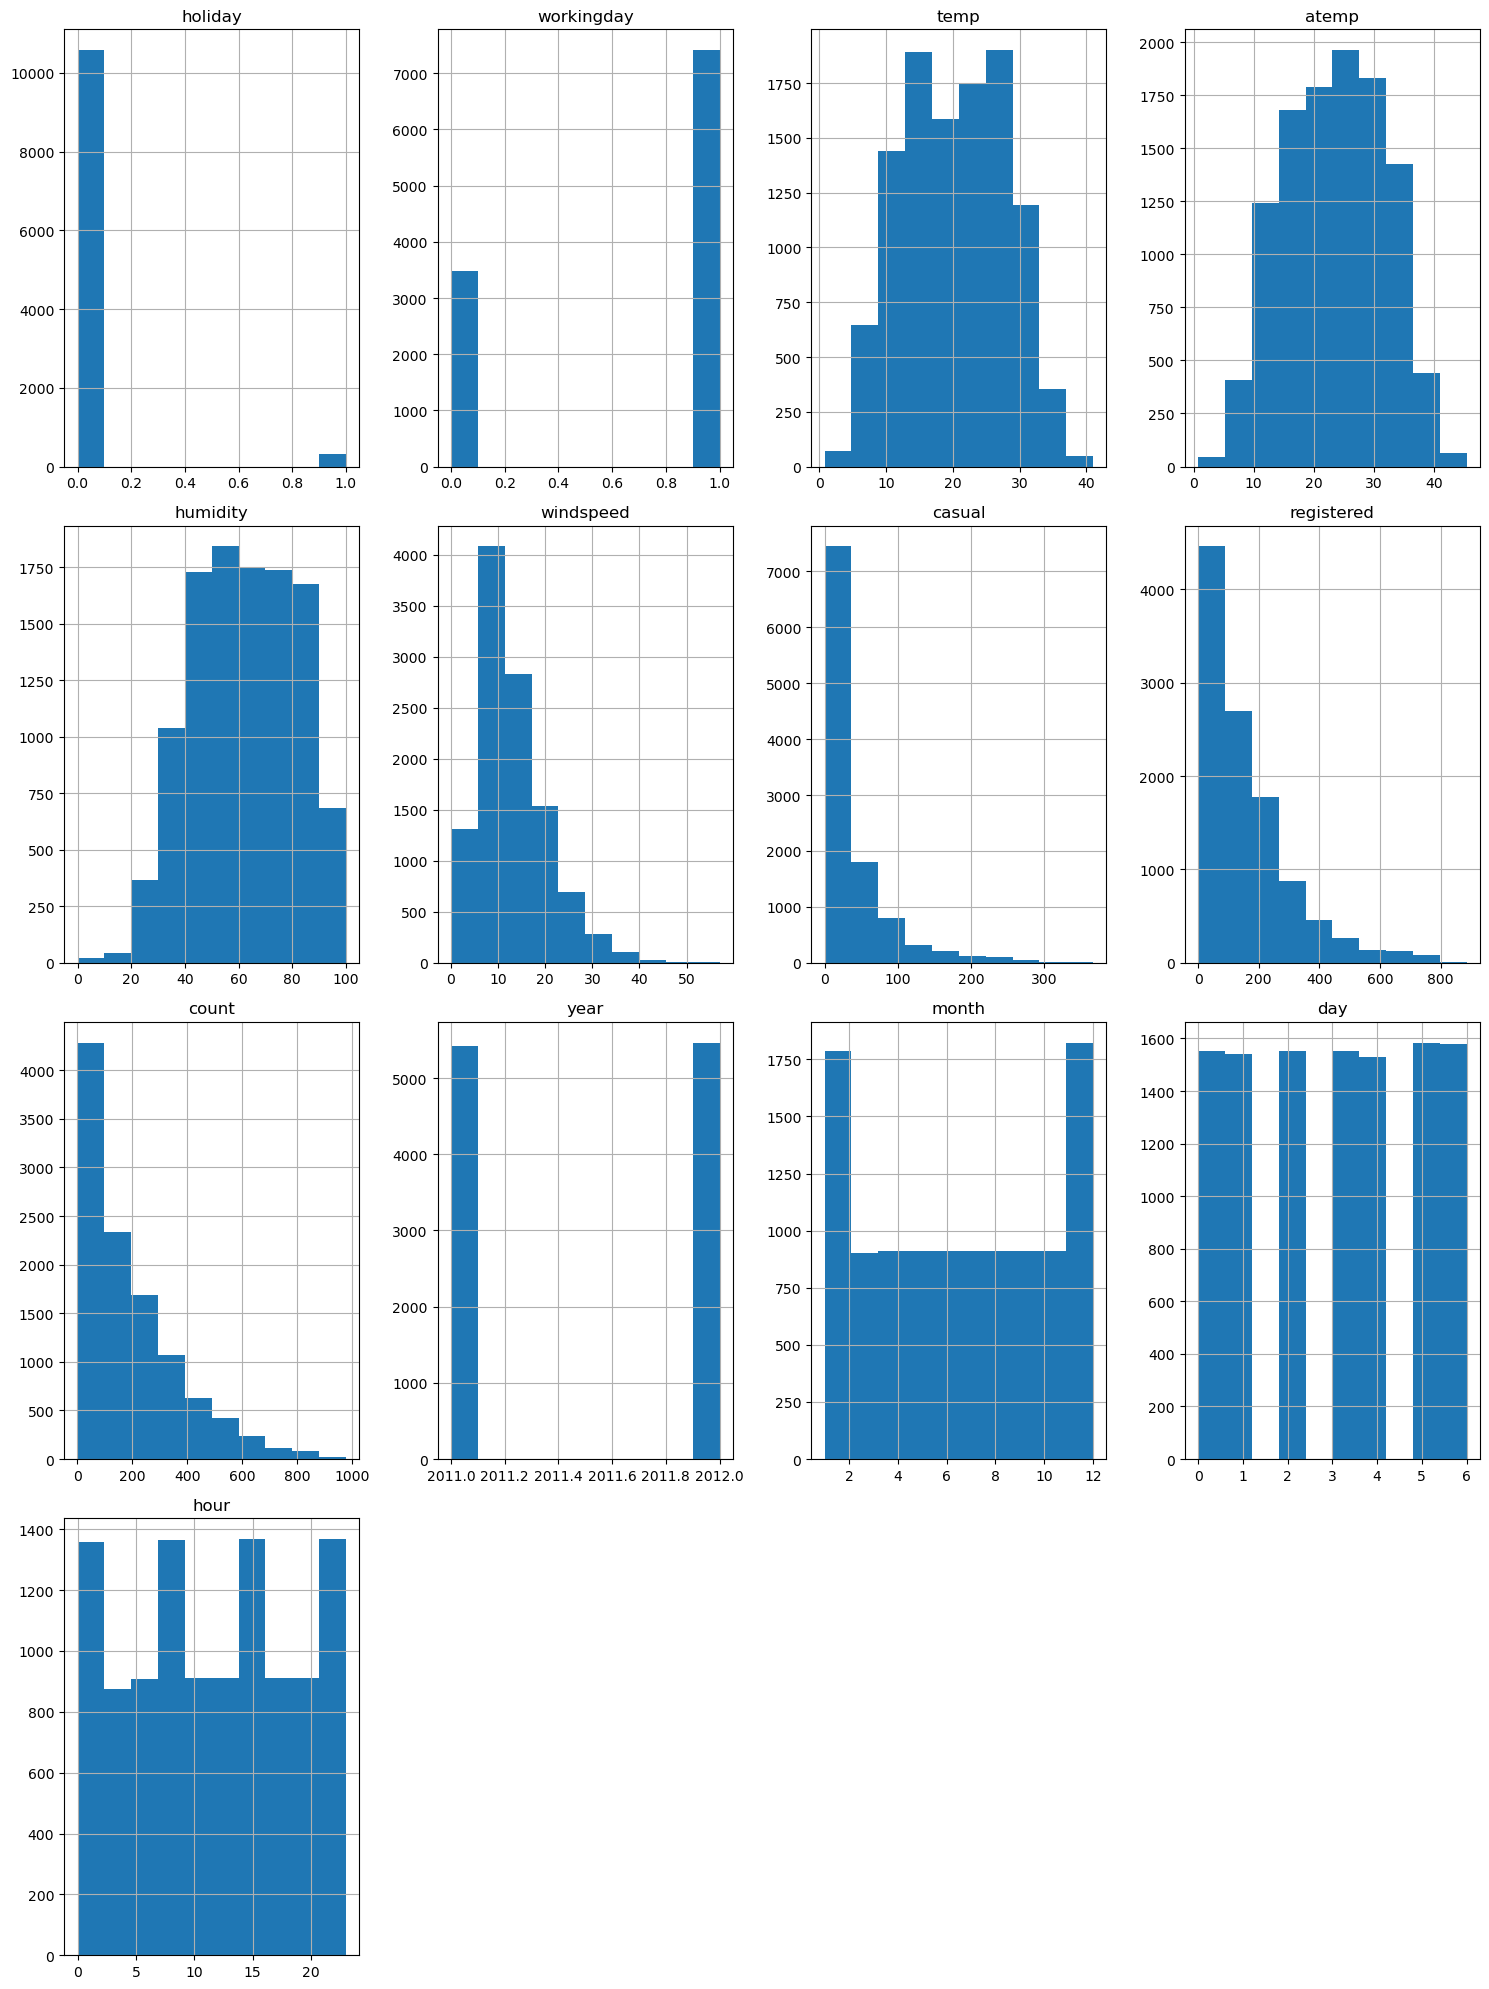

In [34]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,20)) 
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [35]:
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "best_quality" 

In [36]:
predictor_new_features = TabularPredictor(label=label, 
                                          problem_type= 'regression',
                                          eval_metric=eval_metric, 
                                          learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                                           train_data = train_data,
                                                                                           time_limit=time_limit,
                                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20250524_061955"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 19 16:54:57 UTC 2025
CPU Count:          2
Memory Avail:       1.04 GB / 3.76 GB (27.7%)
Disk Space Avail:   2.85 GB / 4.99 GB (57.0%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identi

In [37]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -33.939717  root_mean_squared_error      19.463040  352.033430                0.000848           0.051797            3       True         14
1      WeightedEnsemble_L2  -34.210251  root_mean_squared_error      18.278918  256.781970                0.001104           0.050632            2       True          9
2          CatBoost_BAG_L2  -34.268291  root_mean_squared_error      19.143481  333.090600                0.163246          39.222506            2       True         13
3          LightGBM_BAG_L2  -34.618861  root_mean_squared_error      19.125727  317.208175                0.145492          23.340081            2       True         11
4   RandomForestMSE_BAG_L2  -34.855099  root_mean_squared_error      19.298946  312.759126   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -115.73323148534313,
  'KNeighborsDist_BAG_L1': -112.15711242835349,
  'LightGBMXT_BAG_L1': -36.45988391821316,
  'LightGBM_BAG_L1': -35.79686905713535,
  'RandomForestMSE_BAG_L1': -39.67

In [40]:
leaderboard_new_features_df = pd.DataFrame(predictor_new_features.leaderboard(silent=True))
leaderboard_new_features_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-33.939717,root_mean_squared_error,19.463040,352.033430,0.000848,0.051797,3,True,14
1,WeightedEnsemble_L2,-34.210251,root_mean_squared_error,18.278918,256.781970,0.001104,0.050632,2,True,9
2,CatBoost_BAG_L2,-34.268291,root_mean_squared_error,19.143481,333.090600,0.163246,39.222506,2,True,13
3,LightGBM_BAG_L2,-34.618861,root_mean_squared_error,19.125727,317.208175,0.145492,23.340081,2,True,11
4,RandomForestMSE_BAG_L2,-34.855099,root_mean_squared_error,19.298946,312.759126,0.318711,18.891032,2,True,12
5,LightGBMXT_BAG_L2,-35.110979,root_mean_squared_error,19.523817,320.401397,0.543582,26.533303,2,True,10
6,LightGBM_BAG_L1,-35.796869,root_mean_squared_error,2.502644,34.371927,2.502644,34.371927,1,True,4
7,CatBoost_BAG_L1,-36.151572,root_mean_squared_error,0.194259,136.939974,0.194259,136.939974,1,True,6
8,LightGBMXT_BAG_L1,-36.459884,root_mean_squared_error,14.852371,75.463969,14.852371,75.463969,1,True,3
9,ExtraTreesMSE_BAG_L1,-39.510508,root_mean_squared_error,0.352609,3.111984,0.352609,3.111984,1,True,7


In [41]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    14.008179
1     5.632393
2     3.827842
3     3.111397
4     2.878876
Name: count, dtype: float32

In [42]:
# Remember to set all negative values to zero
predictions_new_features.describe()

count    6493.000000
mean      190.007050
std       174.523880
min        -7.513729
25%        44.942547
50%       148.372940
75%       282.057007
max       906.939819
Name: count, dtype: float64

In [43]:
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_features.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6480
Total negative prediction values : 13


In [44]:
predictions_new_features[predictions_new_features<0] = 0    # (In case, if negative values exist in the predictions_new_features, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [45]:
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [46]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [47]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 796kB/s]
Successfully submitted to Bike Sharing Demand

In [48]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-24 06:36:38.500000  new features          SubmissionStatus.COMPLETE  0.47081      0.47081       
submission.csv               2025-05-24 06:14:15.857000  first raw submission  SubmissionStatus.COMPLETE  1.80193      1.80193       
submission.csv               2025-05-23 16:29:22.550000  first raw submission  SubmissionStatus.COMPLETE  1.79970      1.79970       


#### New Score of `0.47081`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [49]:
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment"  

In [52]:
import autogluon.common as ag


nn_options = {'num_epochs': 5, 
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options, 
                  }  

num_trials = 20            # Number of hyperparameter optimization trials to be performed
search_strategy = 'auto'  # tuned hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train, 
                                                                         time_limit=time_limit,
                                                                         presets=presets, 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')

2025-05-24 06:46:08,755	INFO timeout.py:54 -- Reached timeout of 134.97670539021493 seconds. Stopping all trials.
2025-05-24 06:46:08,792	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/home/sagemaker-user/nd009t-c1-intro-to-ml-project-starter/AutogluonModels/ag-20250524_064127/models/NeuralNetTorch' in 0.0251s.
2025-05-24 06:46:10,414	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 15 trial(s):
- 9d27c09a: FileNotFoundError('Could not fetch metrics for 9d27c09a: both result.json and progress.csv were not found at /home/sagemaker-user/nd009t-c1-intro-to-ml-project-starter/AutogluonModels/ag-20250524_064127/models/NeuralNetTorch/9d27c09a')
- b7ddaa79: FileNotFoundError('Could not fetch metrics for b7ddaa79: both result.json and progress.csv were not found at /home/sagemaker-user/nd009t-c1-intro-to-ml-project-starter/AutogluonModels/ag-20250524_064127/models/NeuralNetTorch/b7ddaa79')
- 21220a7a: FileNotFoundError('Could not fe

[1000]	valid_set's rmse: 38.7165


	-38.6655	 = Validation score   (-root_mean_squared_error)
	2.59s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 288.74s of remaining time.
	Ensemble Weights: {'LightGBM/T12': 0.5, 'LightGBM/T16': 0.5}
	-37.7024	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 311.3s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1096.0 rows/s (2178 batch size)
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method d

In [53]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.702360  root_mean_squared_error       1.987262  11.802284                0.000439           0.010379            2       True          3
1         LightGBM/T12 -38.007447  root_mean_squared_error       0.816486   5.227608                0.816486           5.227608            1       True          1
2         LightGBM/T16 -38.014804  root_mean_squared_error       1.170337   6.564297                1.170337           6.564297            1       True          2
Number of models trained: 3
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])  : 2 | ['season', 'weather']
('float', [])     : 3 | ['t

{'model_types': {'LightGBM/T12': 'LGBModel',
  'LightGBM/T16': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T12': -38.00744712429987,
  'LightGBM/T16': -38.014803553201496,
  'WeightedEnsemble_L2': -37.70236033044235},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T12': ['LightGBM', 'T12'],
  'LightGBM/T16': ['LightGBM', 'T16'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T12': 5.227607727050781,
  'LightGBM/T16': 6.564297199249268,
  'WeightedEnsemble_L2': 0.010378599166870117},
 'model_pred_times': {'LightGBM/T12': 0.816486120223999,
  'LightGBM/T16': 1.170337438583374,
  'WeightedEnsemble_L2': 0.00043892860412597656},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBM/T12': {'learning_rate': 0.008233749120302263,
   'feature_fraction': 0.804137588606093,
   'min_data_in_leaf': 38,
   'num_leaves': 69},
  'LightGBM/T16': {'learning_rate': 0.00804484475

In [54]:
leaderboard_new_hpo_df = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
leaderboard_new_hpo_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.702360,root_mean_squared_error,1.987262,11.802284,0.000439,0.010379,2,True,3
1,LightGBM/T12,-38.007447,root_mean_squared_error,0.816486,5.227608,0.816486,5.227608,1,True,1
2,LightGBM/T16,-38.014804,root_mean_squared_error,1.170337,6.564297,1.170337,6.564297,1,True,2


In [55]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    20.058868
1     3.099653
2     0.135295
3     0.579420
4     0.578223
Name: count, dtype: float32

In [56]:
predictions_new_hpo.describe()

count    6493.000000
mean      189.550095
std       173.672974
min       -25.702311
25%        47.597397
50%       147.349121
75%       281.598999
max       935.393066
Name: count, dtype: float64

In [59]:

negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


In [60]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo<0] = 0    # (In case, if negative values exist in the predictions_new_hpo, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [61]:
# Same thing as train and test dataset
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [62]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [63]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 187k/187k [00:00<00:00, 743kB/s]
Successfully submitted to Bike Sharing Demand

In [66]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-05-24 06:50:45.847000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.55786      0.55786       
submission_new_features.csv  2025-05-24 06:36:38.500000  new features                       SubmissionStatus.COMPLETE  0.47081      0.47081       
submission.csv               2025-05-24 06:14:15.857000  first raw submission               SubmissionStatus.COMPLETE  1.80193      1.80193       
submission.csv               2025-05-23 16:29:22.550000  first raw submission               SubmissionStatus.COMPLETE  1.79970      1.79970       


#### New Score of `0.55786`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

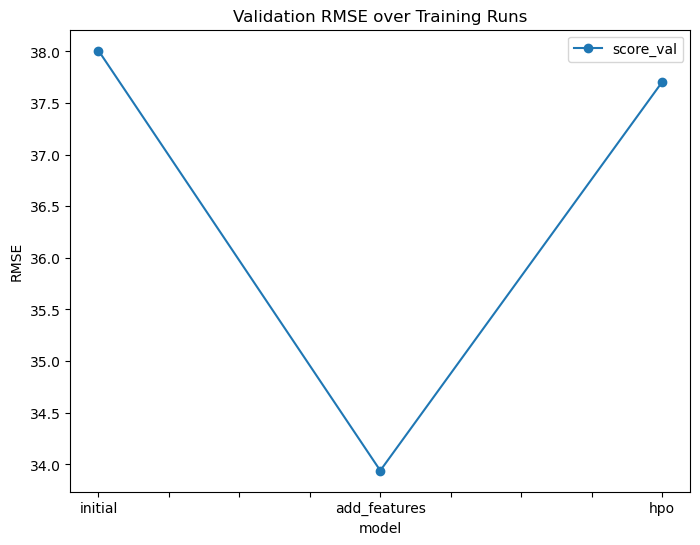

In [71]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)

scores_df = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "score_val": [38.007447, 33.939717, 37.702360]  # Lower RMSE is better
})

fig = scores_df.plot(x="model", y="score_val", kind="line", marker='o', title="Validation RMSE over Training Runs", ylabel="RMSE", figsize=(8, 6)).get_figure()
fig.savefig("model_val_rmse_progression.png")


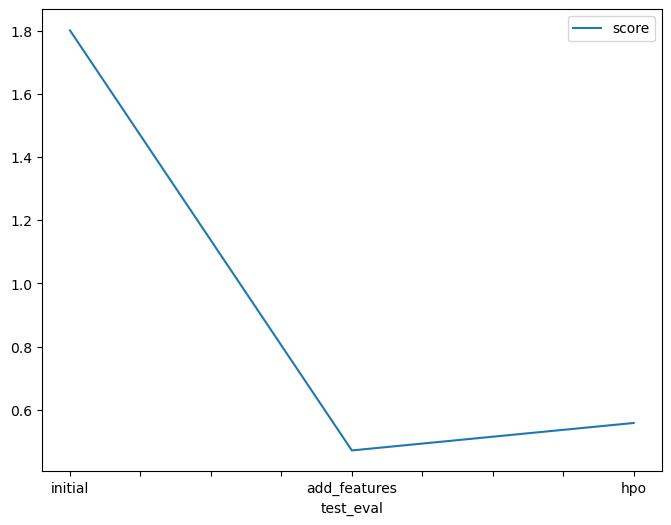

In [72]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80193, 0.47081, 0.55786]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [77]:


pd.DataFrame({
    "model": ["initial", "add_features", "hpo (top-hpo-model: GBM/XT)"],
    "hpo1": ["prescribed_values", "prescribed_values", 
             "GBM: num_boost_round, num_leaves, extra_trees (XT variant)"],
    "hpo2": ["prescribed_values", "prescribed_values", 
             "NN_TORCH: learning_rate, activation, dropout_prob"],
    "hpo3": ["presets: 'best_quality' (auto_stack=True)", 
             "presets: 'best_quality' (auto_stack=True)", 
             "presets: 'best_quality' (auto_stack=True)"],
    "score": [1.80193, 0.47081, 0.55786]
})


,model,hpo1,hpo2,hpo3,score
0,initial,prescribed_values,prescribed_values,presets: 'best_quality' (auto_stack=True),1.80193
1,add_features,prescribed_values,prescribed_values,presets: 'best_quality' (auto_stack=True),0.47081
2,hpo (top-hpo-model: GBM/XT),"GBM: num_boost_round, num_leaves, extra_trees (XT variant)","NN_TORCH: learning_rate, activation, dropout_prob",presets: 'best_quality' (auto_stack=True),0.55786


### Conclusion
The best-performing model in this bike-sharing prediction task was the **WeightedEnsemble_L3**, achieving the lowest RMSE score of **33.94** on validation data. This ensemble approach outperformed all individual models by combining predictions from multiple base learners to optimize accuracy.

For Kaggle-style rankings based on RMSE:

1. **Top 3 Models**:
   - **WeightedEnsemble_L3**: RMSE = 33.94 
   - **CatBoost_BAG_L2**: RMSE = 34.27
   - **LightGBM_BAG_L2**: RMSE = 34.62